# Results
Data distribution over the years

# Import Modules

In [1]:
import os
import string
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter

In [2]:
mpl.rcParams['figure.dpi'] = 400
sns.set(context='paper', style='dark')

# Add path constants

In [3]:
FIG_DIR = 'data/figures'

In [4]:
os.makedirs(FIG_DIR, exist_ok=True)

# Load data file

In [5]:
file = pd.read_csv('data/EDA_df.txt.gz', sep='\t', compression='gzip')

In [6]:
file.head(2)

,SureChEMBL_ID,SMILES,InChIKey,PATENT_ID,PUBLICATION_DATE,Field
0,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2842582-A2,2015-03-04,Description
1,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2838373-A2,2015-02-25,Description


In [7]:
year_list = []
for row in file['PUBLICATION_DATE']:
    g = row.split('-')[0]
    year_list.append(g) 

In [8]:
len(year_list)

133512452

In [9]:
file['Year'] = year_list
file.head(2)

,SureChEMBL_ID,SMILES,InChIKey,PATENT_ID,PUBLICATION_DATE,Field,Year
0,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2842582-A2,2015-03-04,Description,2015
1,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2838373-A2,2015-02-25,Description,2015


In [10]:
file['SureChEMBL_ID'].nunique()

10718652

In [11]:
file['PATENT_ID'].nunique()

1574602

# Filtering duplicate patent IDs

In [12]:
unique_patent_id = file.drop_duplicates(subset=["PATENT_ID","Year"], keep='first')
unique_patent_id.reset_index(drop=True, inplace=True)
len(unique_patent_id)

1574604

In [13]:
unique_patent_id.head(2)

,SureChEMBL_ID,SMILES,InChIKey,PATENT_ID,PUBLICATION_DATE,Field,Year
0,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2842582-A2,2015-03-04,Description,2015
1,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2838373-A2,2015-02-25,Description,2015


# Calculate unique patents per year

In [14]:
patent_count_df = pd.DataFrame(unique_patent_id['Year'].value_counts()).reset_index()
patent_count_df = patent_count_df.sort_values('Year', ascending=True)
patent_count_df

,Year,count
6,2015,188598
4,2016,200056
3,2017,203123
2,2018,207456
5,2019,194261
1,2020,220631
0,2021,222474
7,2022,138005


# Calculate unique compounds per year

In [15]:
unique_smile_id = file.drop_duplicates(subset=["SureChEMBL_ID", "Year"], keep='first')
unique_smile_id.reset_index(drop=True, inplace=True)

In [16]:
unique_smile_id.head(2)

,SureChEMBL_ID,SMILES,InChIKey,PATENT_ID,PUBLICATION_DATE,Field,Year
0,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2842582-A2,2015-03-04,Description,2015
1,SCHEMBL9,O=C(O)\C=C/C(=O)O.CCOC(=O)[C@H](CCC1=CC=CC=C1)...,OYFJQPXVCSSHAI-QFPUQLAESA-N,EP-2838373-A2,2015-02-25,Description,2015


In [17]:
unique_smile_id['SureChEMBL_ID'].nunique()

10718652

In [18]:
compound_count_df = pd.DataFrame(unique_smile_id['Year'].value_counts()).reset_index()
compound_count_df = compound_count_df.sort_values('Year', ascending=True)
compound_count_df

,Year,count
4,2015,2734421
3,2016,2851935
0,2017,3358356
6,2018,2572604
5,2019,2637464
2,2020,2921979
1,2021,3006767
7,2022,1828122


In [35]:
repes_smiles = pd.read_csv('repeated_smiles.tsv', sep=',')
repes_smiles

,year,count
0,2015,2734421
1,2016,1301633
2,2017,1822907
3,2018,1698839
4,2019,1656341
5,2020,1725493
6,2021,1783109
7,2022,1204679


In [36]:
repes_smiles['count_e'] = compound_count_df['count'].values

In [37]:
repes_smiles['Net'] = repes_smiles['count_e'] - repes_smiles['count']

In [52]:
repes_smiles['count'] = repes_smiles['count'].replace(2734421,0) #starting year 

In [53]:
repes_smiles

,year,count,count_e,Net
0,2015,0,2734421,0
1,2016,1301633,2851935,1550302
2,2017,1822907,3358356,1535449
3,2018,1698839,2572604,873765
4,2019,1656341,2637464,981123
5,2020,1725493,2921979,1196486
6,2021,1783109,3006767,1223658
7,2022,1204679,1828122,623443


In [24]:
repes_smiles['Net'].mean()/10718652

0.09311135859247972

9.3% compounds were found to be repurposed

# Visualisation

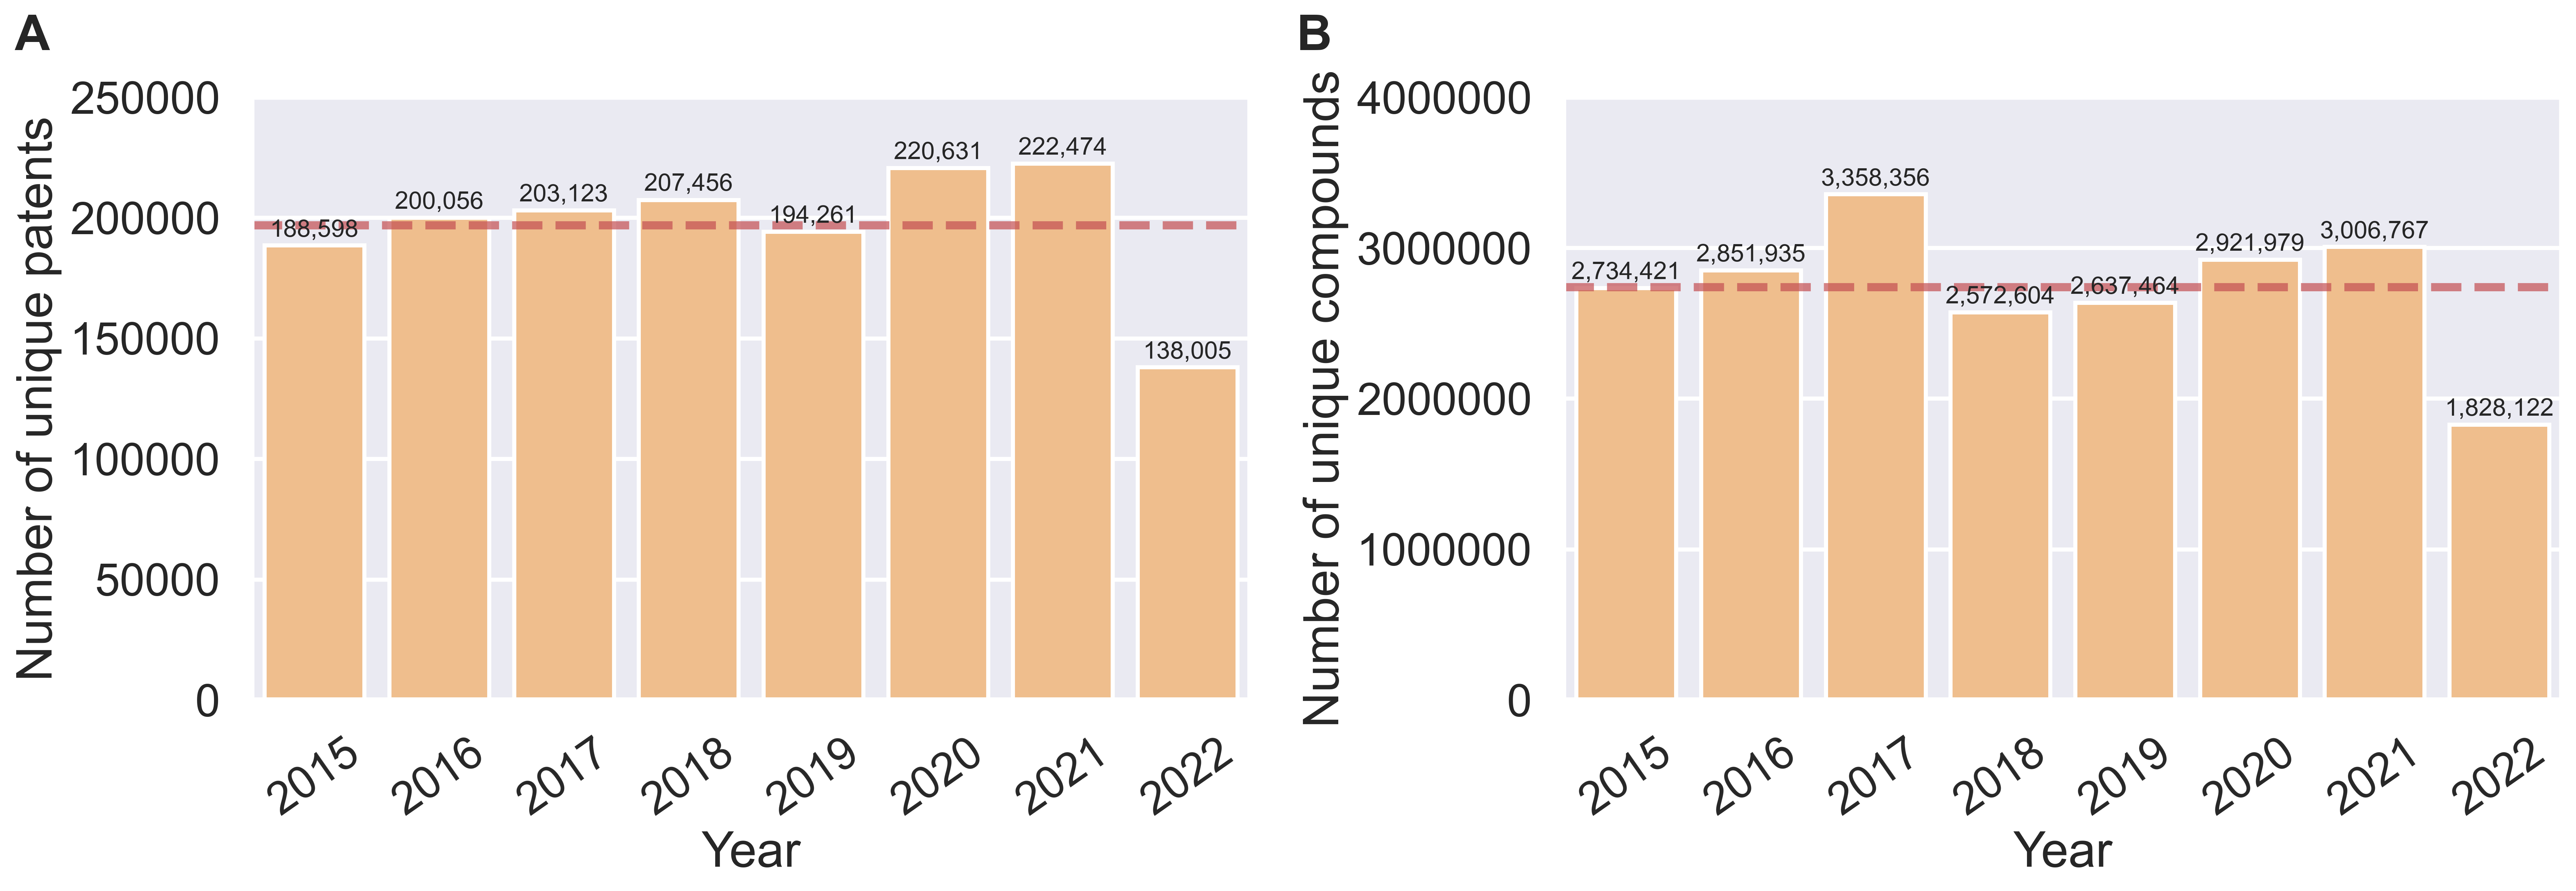

In [55]:
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize = (18,11))

patent_count_avg = patent_count_df['count'].mean()
ax1 = plt.subplot(gs[0, 0])
ax1 = sns.barplot(x= patent_count_df['Year'], y= patent_count_df['count'], color='#ffbe7d')
ax1.axhline(patent_count_avg, linewidth=4, color='r', linestyle = '--', alpha=0.7)
sns.set(context='poster')
plt.xlabel("Year")
plt.ylabel("Number of unique patents")
plt.xticks(rotation=35)
plt.ylim(top = 250000)
for c in ax1.containers:
    ax1.bar_label(c, labels=[f'{x:,.0f}' for x in c.datavalues], padding= 2, fontsize=12)
plt.text(
    -0.22, 1.1, string.ascii_uppercase[0],
    size=24, weight='bold', horizontalalignment='center',
    verticalalignment='center', transform = plt.gca().transAxes
)

cpds_count_avg = compound_count_df['count'].mean()
ax2 = plt.subplot(gs[0, 1])
ax2 = sns.barplot(x= compound_count_df['Year'], y= compound_count_df['count'], color='#ffbe7d')
ax2.axhline(cpds_count_avg, linewidth=4, color='r', linestyle = '--', alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Number of unique compounds")
plt.xticks(rotation=35)
plt.ylim(top = 4000000)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
for c in ax2.containers:
    ax2.bar_label(c, labels=[f'{x:,.0f}' for x in c.datavalues], padding=2, fontsize=12)
plt.text(
    -0.25, 1.1, string.ascii_uppercase[1],
    size=24, weight='bold', horizontalalignment='center',
    verticalalignment='center', transform = plt.gca().transAxes
)

plt.tight_layout()
plt.savefig(f'{FIG_DIR}/figure_2.png',dpi=400)
plt.show()

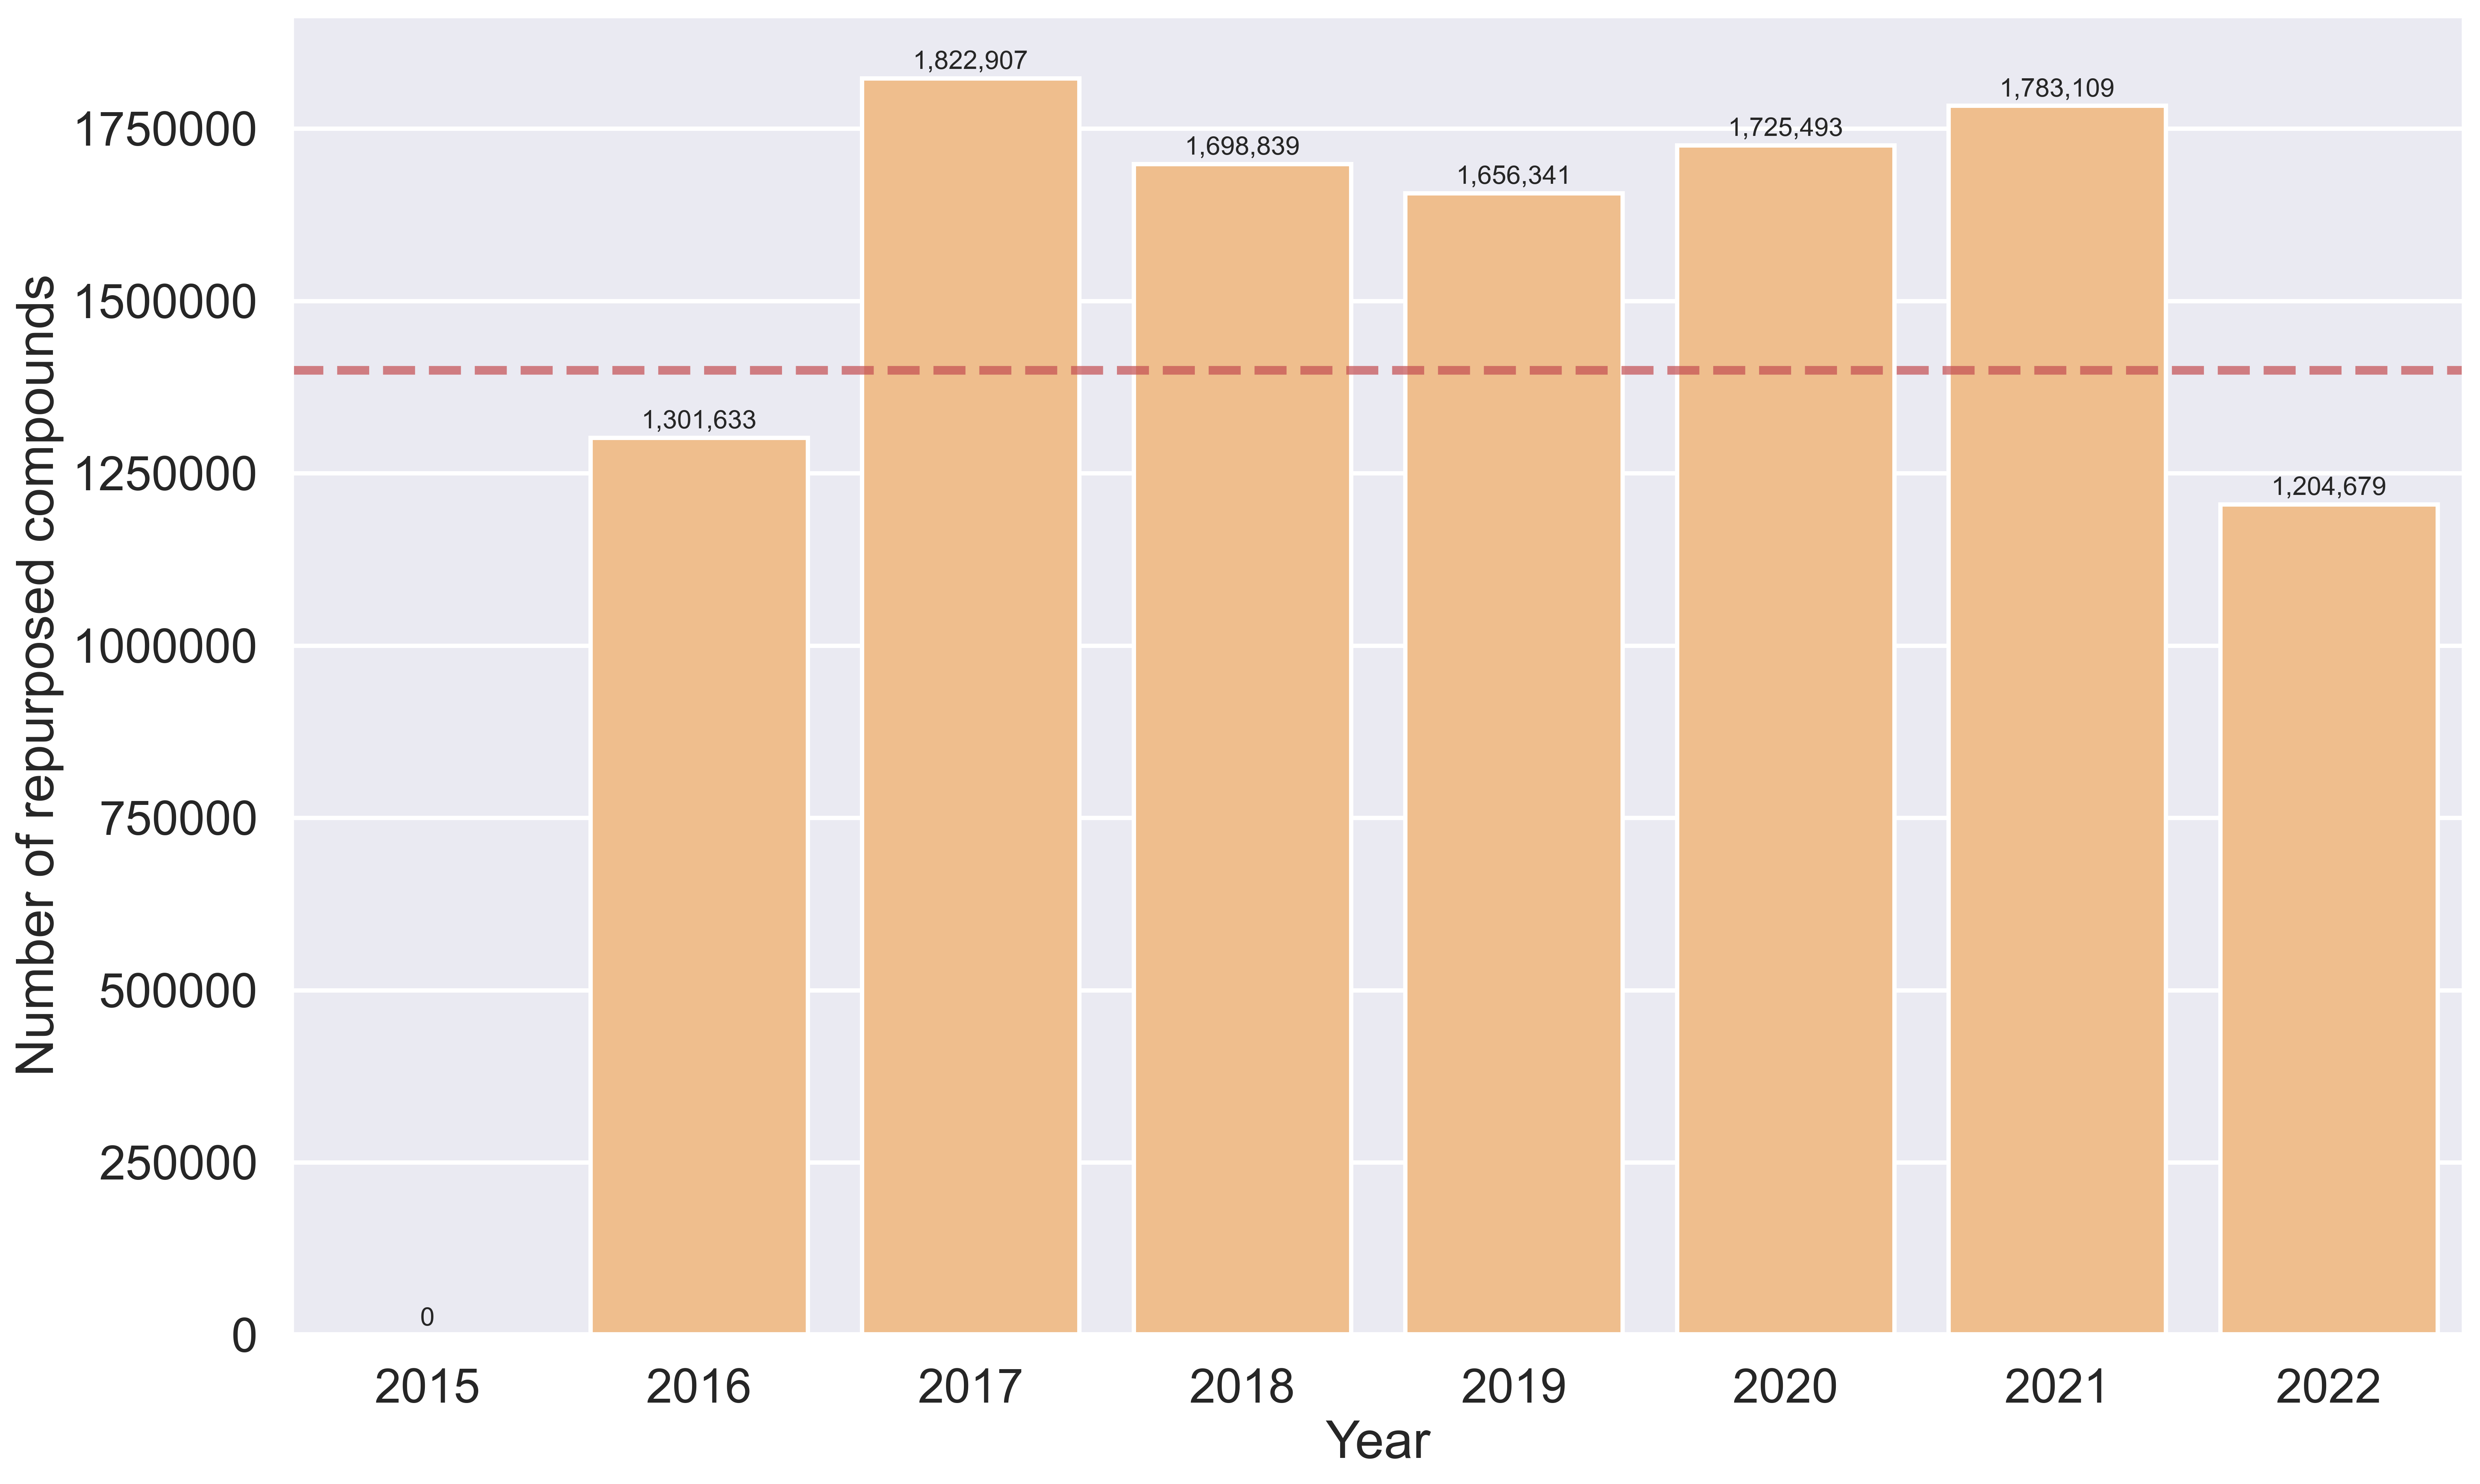

In [54]:
plt.figure(figsize = (18, 11))
ax = sns.barplot(x= repes_smiles['year'], y= repes_smiles['count'], color='#ffbe7d')
ax.axhline(repes_smiles['count'].mean(), linewidth=4, color='r', linestyle = '--', alpha=0.7)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
for c in ax.containers:
    ax.bar_label(c, labels=[f'{x:,.0f}' for x in c.datavalues], padding= 2, fontsize=12)
sns.set(context='poster')
plt.xlabel("Year")
plt.ylabel("Number of repurposed compounds")
plt.savefig(f'{FIG_DIR}/figure_3.png',dpi=400)
plt.show()